In [37]:
import pandas as pd
df=pd.read_csv("Raisin_Dataset_2.csv")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [49]:
import matplotlib.pyplot as plt
valores_x=df['Area'].unique()
valores_y=df['Area'].value_counts().tolist()

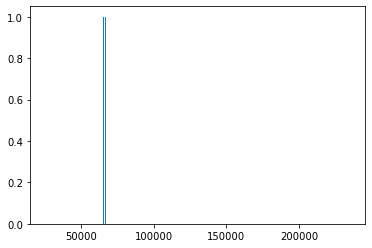

In [50]:
plt.bar(valores_x,valores_y)
plt.show()

In [117]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
y=df[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [118]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [119]:
y_predict =clf_model.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_predict)

0.8481481481481481

In [121]:
target =list(df['Class'].unique())
feature_names =list(X.columns)

In [122]:
from sklearn.tree import export_text
r =export_text(clf_model, feature_names = feature_names)
print(r)

|--- MajorAxisLength <= 425.13
|   |--- Perimeter <= 1122.50
|   |   |--- Eccentricity <= 0.87
|   |   |   |--- class: 0
|   |   |--- Eccentricity >  0.87
|   |   |   |--- class: 1
|   |--- Perimeter >  1122.50
|   |   |--- Extent <= 0.73
|   |   |   |--- class: 1
|   |   |--- Extent >  0.73
|   |   |   |--- class: 0
|--- MajorAxisLength >  425.13
|   |--- MajorAxisLength <= 463.85
|   |   |--- Area <= 87000.50
|   |   |   |--- class: 1
|   |   |--- Area >  87000.50
|   |   |   |--- class: 1
|   |--- MajorAxisLength >  463.85
|   |   |--- Perimeter <= 1196.07
|   |   |   |--- class: 1
|   |   |--- Perimeter >  1196.07
|   |   |   |--- class: 1

